In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from simplegrad import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
import seaborn as sns
from simplegrad.algo.nn import DenseLayer, SequentialModel
from simplegrad.algo.optimize import *
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [53]:
Y = np.eye(10)[y]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=y)
# X_train = np.array(X_train, dtype=np.float32)
# X_test = np.array(X_test, dtype=np.float32)
# y_train = np.array(y_train, dtype=np.float32)
# y_test = np.array(y_test, dtype=np.float32)
X_train.shape, X_test.shape, y_train.shape

((1347, 64), (450, 64), (1347, 10))

In [55]:
X_train.dtype

dtype('float64')

In [101]:
def makeModel():
    return SequentialModel(layers=[
        DenseLayer(num_neurons=32, activation='sigmoid'),
        DenseLayer(num_neurons=16, activation='sigmoid'),
        DenseLayer(num_neurons=10, activation='softmax')
    ])

iter = 2000

In [105]:
%%time
history = []
model = makeModel()
model.fit(
    X_train,
    y_train,
    loss="crossentropy",
    optimizer=Adam(lr=0.01),
    iterations=iter,
    verbose=1,
    history=history
)
pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(np.argmax(y_test, axis=-1), pred)

  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 3min 34s, sys: 35.3 s, total: 4min 9s
Wall time: 27.4 s


0.98

In [106]:
%%time
model = makeModel()
historyMom = []
model.fit(
    X_train,
    y_train,
    loss="crossentropy",
    optimizer=Momentum(lr=0.001),
    iterations=iter,
    verbose=1,
    history=historyMom
)
pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(np.argmax(y_test, axis=-1), pred)

  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 3min 57s, sys: 37.1 s, total: 4min 34s
Wall time: 31.1 s


0.7666666666666667

In [110]:
%%time
model = makeModel()
historyRms = []
model.fit(
    X_train,
    y_train,
    loss="crossentropy",
    optimizer=RMSProp(lr=0.01),
    iterations=iter,
    verbose=1,
    history=historyRms
)
pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(np.argmax(y_test, axis=-1), pred)

  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 4min 30s, sys: 49.9 s, total: 5min 20s
Wall time: 36.5 s


0.9777777777777777

In [114]:
%%time
model = makeModel()
historyGd = []
model.fit(
    X_train,
    y_train,
    loss="crossentropy",
    optimizer=GD(lr=0.001),
    iterations=iter,
    verbose=1,
    history=historyGd
)
pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(np.argmax(y_test, axis=-1), pred)

  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 4min 18s, sys: 33.3 s, total: 4min 51s
Wall time: 34.5 s


0.8755555555555555

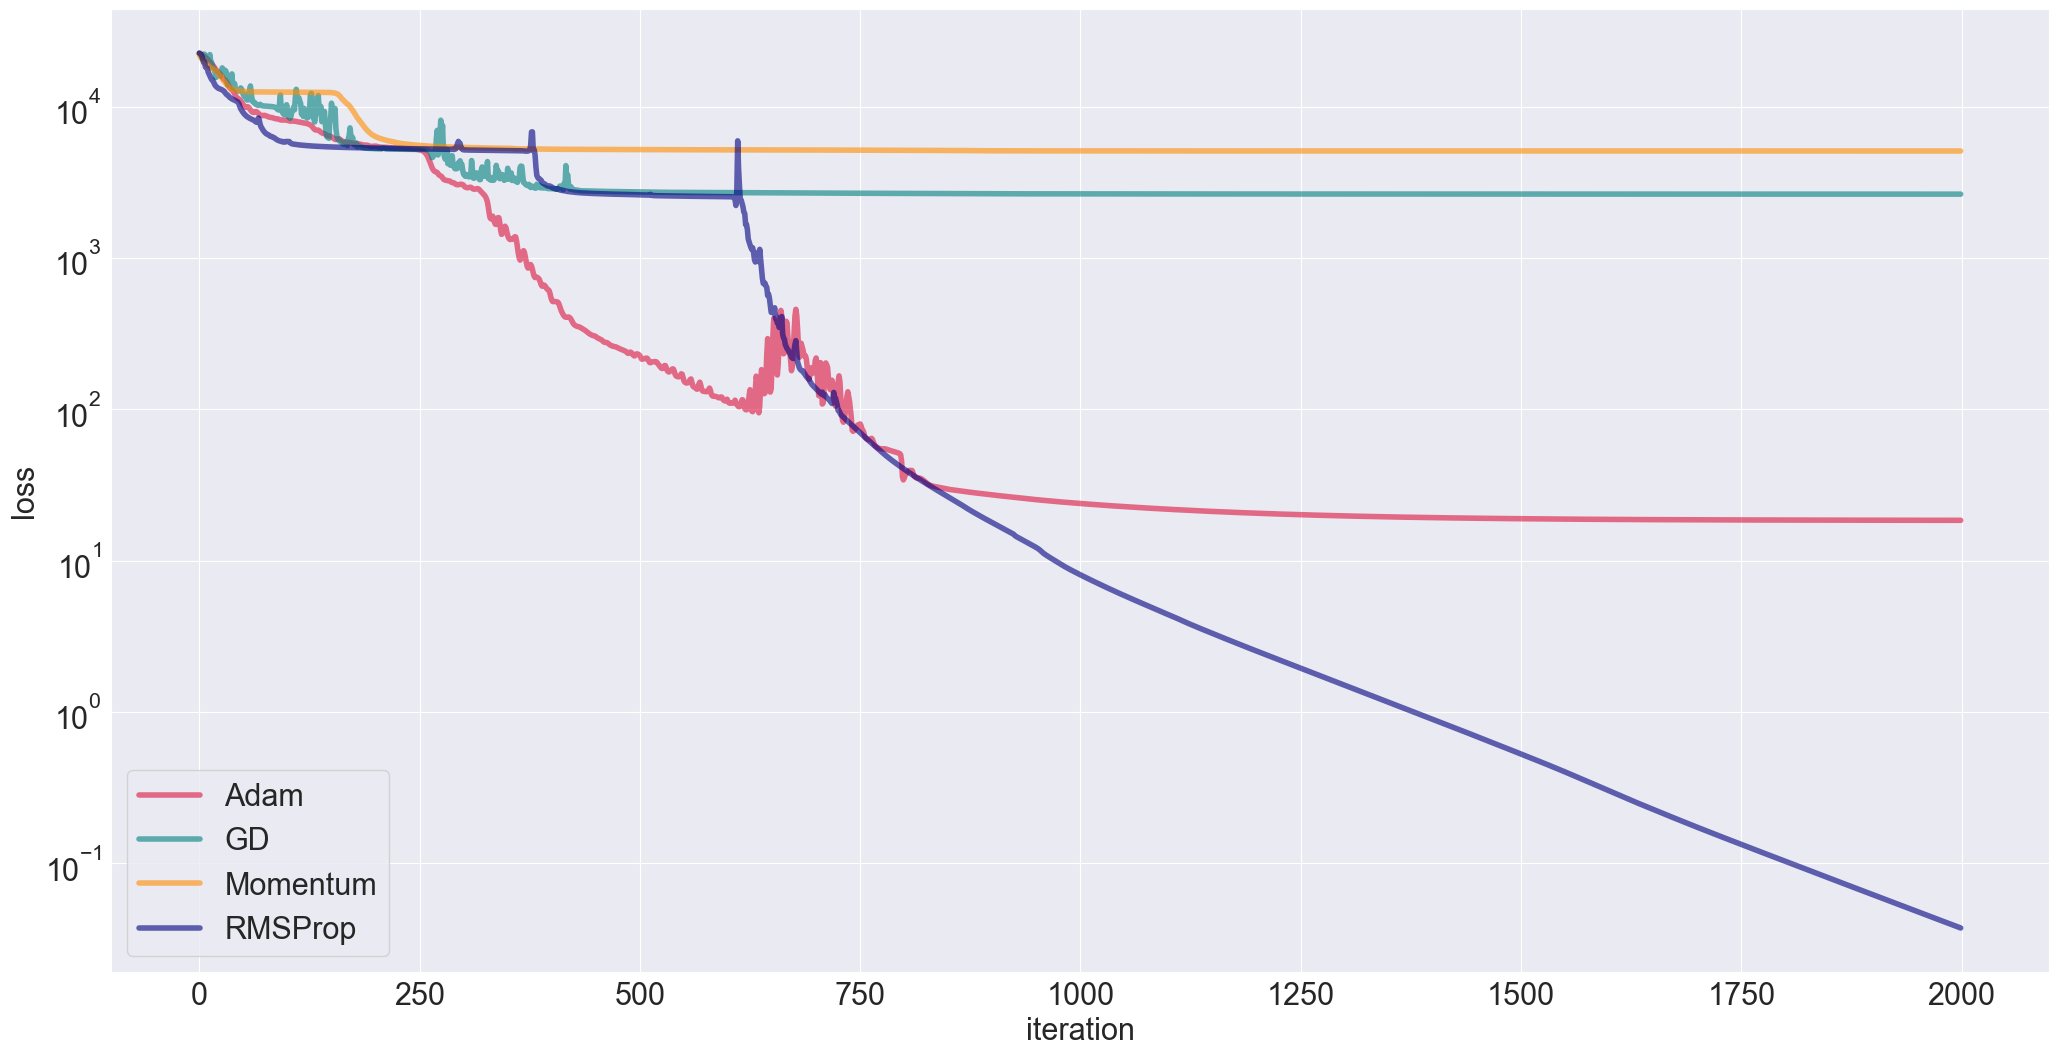

In [118]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(25, 25/2))
sns.lineplot(x=np.arange(len(history)), y=history, color='crimson', label="Adam", linewidth=4, alpha=0.6)
sns.lineplot(x=np.arange(len(historyGd)), y=historyGd, color='teal', label="GD", linewidth=4, alpha=0.6)
sns.lineplot(x=np.arange(len(historyMom)), y=historyMom, color='darkorange', label="Momentum", linewidth=4, alpha=0.6)
sns.lineplot(x=np.arange(len(historyRms)), y=historyRms, color='navy', label="RMSProp", linewidth=4, alpha=0.6)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.yscale('log')
None

In [127]:
device = torch.device('cpu')
X_train_ = torch.tensor(X_train, device=device, dtype=torch.float32)
X_test_ = torch.tensor(X_test, device=device, dtype=torch.float32)
y_train_ = torch.tensor(y_train, device=device, dtype=torch.float32)

In [128]:
class NeuralNet(nn.Module):
    def __init__(self, device='cpu'):
        super(NeuralNet, self).__init__()
        self.first = nn.Linear(64, 32, device=device)
        self.tanh = nn.Tanh()
        self.second = nn.Linear(32, 16, device=device)
        self.third = nn.Linear(16, 10, device=device)
        self.out = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.first(x)
        x = self.tanh(x)
        x = self.second(x)
        x = self.tanh(x)
        x = self.third(x)
        return self.out(x)



model = NeuralNet(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

In [129]:
%%time
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_train_)
    loss = loss_fn(output, y_train_)
    loss.backward()
    optimizer.step()

CPU times: user 1.53 s, sys: 712 ms, total: 2.24 s
Wall time: 1.22 s


In [130]:
pred = np.argmax(model(X_test_).detach().cpu().numpy(), axis=-1)
accuracy_score(np.argmax(y_test, axis=-1), pred)


0.9755555555555555

In [126]:
102
1
9

9